In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/My Drive/car_predict_price.csv')
df

In [ ]:
df['price'] = df['price'].astype(float) #轉換欄位型別

In [ ]:
df.dtypes

In [ ]:
df.columns#查詢有哪些欄位

In [ ]:
df[df.isnull().values==True] #查看所有包含空值的rows

In [ ]:
df['power'].fillna(value=2.0, inplace=True) #針對欄位補植

In [ ]:
for i in df.columns[17:]: #所有沒有該配件的欄位都補零
  df[i].fillna(value=0, inplace=True)

In [ ]:
df = df.drop(['color'], axis=1) #刪除column
df

In [ ]:
df['cc'].value_counts(dropna=False) #查詢欄位值的分布數量

In [ ]:
delete_row = df[df['color'].isnull()==True].index #查詢欄位的Null比率
((df.loc[delete_row].shape[0])/(df.shape[0]))*100

In [ ]:
delete_row = df[df['price']==1950].index #查詢需要刪除的rows
delete_row

In [ ]:
df.drop(delete_row,inplace=True) #刪除該列

In [ ]:
df['type']

In [ ]:
df.groupby('source').size()

In [ ]:
catch_df = df[df['gas'].isnull()==True] #查詢欄位空值資訊
catch_df.groupby("type").size()

In [ ]:
len(df['color'].unique()) #列出欄位包含那些值

In [ ]:
df.loc[df['people'].isnull()==True] = df['people'].mode()[0] #針對特定的值改變

In [ ]:
df['people'].mode()[0]

In [ ]:
df[df['price'] == '350以下'] = df[df['price'] == 350] #修改特定的值

In [ ]:
df[df['color'].isnull()==True]

In [ ]:
df.to_csv('/content/drive/My Drive/car_predict_price.csv',index=False) #儲存檔案

In [ ]:
#frame = frame[['column I want first', 'column I want second'...etc.]] #轉換column順序
df = df[['brand', 'type', 'gas', 'sys', 'color', 'cc','miles', 'year',
       'power', 'l_chair', 'auto_chair', 'cd', 'media', 'back_radar',
       'back_screen', 'ABS', 'window', 'hid', 'air_con', 'safe_bag', 'alu',
       'keyless', 'gps', 'led', 'trc', 'tcs', 'ldws', 'aeb', 'ss', 'acc',
       'hud', 'auto_windows', 'auto_side', 'alert', 'tpms', 'es', 'isofix',
       'multi_wheel', 'auto_park', 'people', 'silde_door', 'female_used',
       'turbo', 'warranty', 'fog_lights', 'blind_spot', 'electric_tailgate',
       'whole_window', 'lcd', 'shift_paddles', 'epb', 'clc','price']]
df

In [ ]:
#OneHotEncoder處理轉換文字資料
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/car_predict_price_onehot.csv')
df2

In [ ]:
df2 = df[['brand', 'type', 'gas', 'sys', 'color']]
df2.to_csv('/content/drive/My Drive/car_predict_price_onehot.csv',index=False)

In [ ]:
df2 = df2.drop(['Unnamed: 0'], axis=1) #刪除column
df2

In [ ]:
# df2['color'] = labelencoder.fit_transform(df2['color'])
# df2

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder(categories='auto')
# data_str_one=onehotencoder.fit_transform([df2['brand'].values]).toarray()
# x = pd.DataFrame(data_str_one)
data_dum = pd.get_dummies(df2)
data_dum = pd.DataFrame(data_dum)
data_dum

In [ ]:
data_dum.to_csv('/content/drive/My Drive/car_predict_price_onehot_done.csv',index=False)

In [ ]:
finaldf = pd.concat([data_dum,df], axis=1, join='inner').sort_index()
finaldf

In [ ]:
finaldf.keys

<bound method NDFrame.keys of        brand_Acura  brand_Alfa Romeo  brand_Asia  ...  epb  clc  price
0                0                 0           0  ...  0.0  0.0   38.8
1                0                 0           0  ...  0.0  0.0  118.8
2                0                 0           0  ...  0.0  0.0   62.6
3                0                 0           0  ...  0.0  0.0   64.8
4                0                 0           0  ...  0.0  0.0   65.5
...            ...               ...         ...  ...  ...  ...    ...
48814            0                 0           0  ...  0.0  0.0   35.8
48815            0                 0           0  ...  0.0  0.0   58.9
48816            0                 0           0  ...  0.0  0.0   39.9
48817            0                 0           0  ...  0.0  0.0   23.8
48818            0                 0           0  ...  0.0  0.0   43.8

[48819 rows x 1201 columns]>

In [ ]:
finaldf['price'].describe()

In [17]:
finaldf.to_csv('/content/drive/My Drive/car_predict_price_final.csv',index=False)

In [ ]:
finaldf = pd.read_csv('/content/drive/My Drive/car_predict_price_final.csv')
finaldf

In [ ]:
plt.boxplot(finaldf['price']) #盒鬚圖
plt.title('Box Plot')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#regression
finaldf.columns

Index(['brand_Acura', 'brand_Alfa Romeo', 'brand_Asia', 'brand_Aston Martin',
       'brand_Audi', 'brand_Austin', 'brand_BMW', 'brand_Bentley',
       'brand_Buick', 'brand_CMC',
       ...
       'warranty', 'fog_lights', 'blind_spot', 'electric_tailgate',
       'whole_window', 'lcd', 'shift_paddles', 'epb', 'clc', 'price'],
      dtype='object', length=1201)

In [ ]:
x = finaldf.iloc[:,:-1]
# y = finaldf.price
y = pd.DataFrame(finaldf['price'])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
regr = LinearRegression()

In [ ]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = regr.predict(x_test)

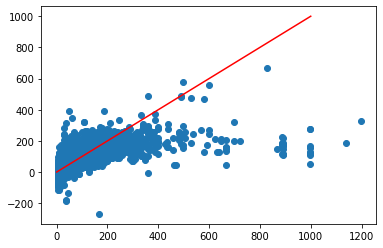

In [ ]:
plt.scatter(y_test,y_predict)
plt.plot([0,1000],[0,1000],'r')

In [ ]:
#SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [ ]:
svm = SVC(kernel='linear',probability=True)

In [ ]:
x_train_array = np.array(x_train_std, dtype=int)
y_train_array = np.array(y_train['price'].values, dtype=int)
svm.fit(x_train_array, y_train_array)

In [ ]:
svm.predict(x_test_std)

In [2]:
#KNN
#載入套件
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
finaldf = pd.read_csv('/content/drive/My Drive/car_predict_price_final.csv')
finaldf

,brand_Acura,brand_Alfa Romeo,brand_Asia,brand_Aston Martin,brand_Audi,brand_Austin,brand_BMW,brand_Bentley,brand_Buick,brand_CMC,brand_Cadillac,brand_Chevrolet,brand_Chrysler,brand_Citroen,brand_DFSK,brand_Daihatsu,brand_Dodge,brand_Ferrari,brand_Fiat,brand_Ford,brand_Formosa,brand_Foton,brand_Hino,brand_Honda,brand_Hummer,brand_Hyundai,brand_IVECO,brand_Infiniti,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Lamborghini,brand_Land Rover,brand_Lexus,brand_Lincoln,brand_Lotus,brand_Luxgen,brand_Mahindra,brand_Maserati,...,back_radar,back_screen,ABS,window,hid,air_con,safe_bag,alu,keyless,gps,led,trc,tcs,ldws,aeb,ss,acc,hud,auto_windows,auto_side,alert,tpms,es,isofix,multi_wheel,auto_park,people,silde_door,female_used,turbo,warranty,fog_lights,blind_spot,electric_tailgate,whole_window,lcd,shift_paddles,epb,clc,price
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.8
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.8
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.6
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.8
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45603,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.8
45604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.9
45605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.9
45606,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.8


In [4]:
finaldf['price'].describe()

count    45608.000000
mean        54.686053
std         38.773898
min          5.100000
25%         25.800000
50%         42.600000
75%         73.800000
max        172.000000
Name: price, dtype: float64

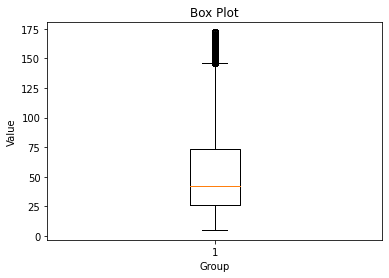

In [5]:
plt.boxplot(finaldf['price']) #盒鬚圖
plt.title('Box Plot')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()

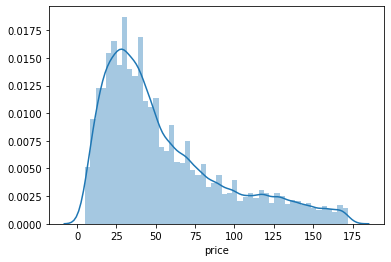

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.distplot(finaldf['price'],bins=None,hist=True,kde=True,rug=False,fit=None,color=None,vertical=False,rug_kws=None,hist_kws=None,kde_kws=None)

In [1]:
# seaborn histogram
#先觀察和卡額度分布圖,可看到最高有到500萬的離群值,然而大部分的額度都在50萬以下
sns.distplot(finaldf['price'], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('distribution')
plt.xlabel('credLimit')
plt.ylabel('sequence')

NameError: ignored

In [7]:
Percentile = np.percentile(finaldf['price'],[0,25,50,75,100]) #array([  5.1,  26.8,  45.8,  85. , 499. ])
IQR = Percentile[3] - Percentile[1] #58.2
UpLimit = Percentile[3]+IQR*1.5 #172.3
DownLimit = Percentile[1]-IQR*1.5 #-60.5
UpLimit

145.8

In [13]:
#刪除超過上四分位+1.5倍IQR距離,約3000筆
delete_row = finaldf[finaldf['price']>UpLimit].index 
delete_row

Int64Index([    6,    30,    40,    43,    54,    69,    95,   113,   123,
              130,
            ...
            48331, 48332, 48336, 48367, 48384, 48386, 48393, 48407, 48411,
            48423],
           dtype='int64', length=3036)

In [14]:
finaldf.drop(delete_row,inplace=True)

In [16]:
finaldf

,brand_Acura,brand_Alfa Romeo,brand_Asia,brand_Aston Martin,brand_Audi,brand_Austin,brand_BMW,brand_Bentley,brand_Buick,brand_CMC,brand_Cadillac,brand_Chevrolet,brand_Chrysler,brand_Citroen,brand_DFSK,brand_Daihatsu,brand_Dodge,brand_Ferrari,brand_Fiat,brand_Ford,brand_Formosa,brand_Foton,brand_Hino,brand_Honda,brand_Hummer,brand_Hyundai,brand_IVECO,brand_Infiniti,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Lamborghini,brand_Land Rover,brand_Lexus,brand_Lincoln,brand_Lotus,brand_Luxgen,brand_Mahindra,brand_Maserati,...,back_radar,back_screen,ABS,window,hid,air_con,safe_bag,alu,keyless,gps,led,trc,tcs,ldws,aeb,ss,acc,hud,auto_windows,auto_side,alert,tpms,es,isofix,multi_wheel,auto_park,people,silde_door,female_used,turbo,warranty,fog_lights,blind_spot,electric_tailgate,whole_window,lcd,shift_paddles,epb,clc,price
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.8
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.8
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.6
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.8
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.8
48640,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.9
48641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.9
48642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.8


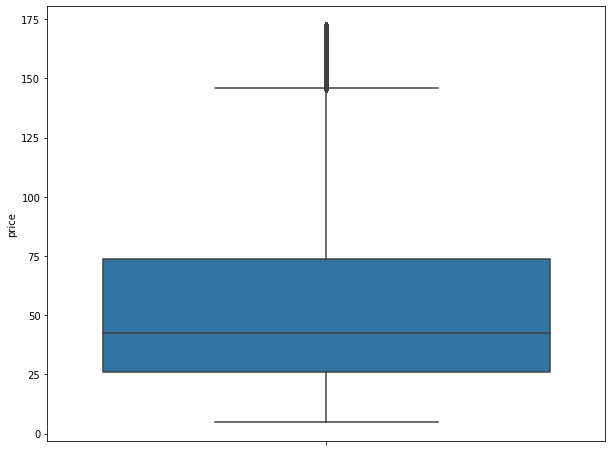

In [22]:
f,ax=plt.subplots(figsize=(10,8))
sns.boxplot(y='price',data=finaldf,ax=ax)
plt.show()

In [27]:
#做法2.VIF 一般認為去除10以上的即可
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy as sp
cc = sp.corrcoef(finaldf, rowvar=False)
VIF = np.linalg.inv(cc)
VIF.diagonal()
#但若去除太多怕不好解釋  看你們

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([nan, nan, nan, ..., nan, nan, nan])

In [68]:
#由於KNN分類法是藉由確認最近的觀察值來預測分類，因此變數的比例就會影響很大
#載入標準化比例尺(StandardScaler)套件
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(finaldf.drop('price',axis=1))
scaled_features = scaler.transform(finaldf.drop('price',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=finaldf.columns[:-1])
df_feat.head()

,brand_Acura,brand_Alfa Romeo,brand_Asia,brand_Aston Martin,brand_Audi,brand_Austin,brand_BMW,brand_Bentley,brand_Buick,brand_CMC,brand_Cadillac,brand_Chevrolet,brand_Chrysler,brand_Citroen,brand_DFSK,brand_Daihatsu,brand_Dodge,brand_Ferrari,brand_Fiat,brand_Ford,brand_Formosa,brand_Foton,brand_Hino,brand_Honda,brand_Hummer,brand_Hyundai,brand_IVECO,brand_Infiniti,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Lamborghini,brand_Land Rover,brand_Lexus,brand_Lincoln,brand_Lotus,brand_Luxgen,brand_Mahindra,brand_Maserati,...,media,back_radar,back_screen,ABS,window,hid,air_con,safe_bag,alu,keyless,gps,led,trc,tcs,ldws,aeb,ss,acc,hud,auto_windows,auto_side,alert,tpms,es,isofix,multi_wheel,auto_park,people,silde_door,female_used,turbo,warranty,fog_lights,blind_spot,electric_tailgate,whole_window,lcd,shift_paddles,epb,clc
0,-0.004683,-0.026498,-0.004683,-0.006622,-0.174984,-0.006622,-0.344598,-0.02608,-0.011471,-0.082457,-0.022462,-0.022462,-0.006622,-0.014809,-0.018733,-0.028106,-0.016885,-0.006622,-0.01239,-0.249513,-0.004683,-0.009365,-0.028877,3.695339,-0.021463,-0.187503,-0.010471,-0.084849,-0.039764,-0.044218,-0.016885,-0.05529,-0.01239,-0.052002,-0.210548,-0.004683,0.0,-0.168489,-0.013245,-0.04917,...,-0.465162,0.80261,-1.282462,0.0,-0.391411,-0.354747,0.534926,-2.063495,-0.176509,-0.995232,-1.075221,-0.842096,-0.450234,-0.942204,-0.20798,-0.992747,-1.326753,-0.155738,-0.114481,0.0,0.0,-1.14802,-0.997504,-0.852099,-0.939057,-1.280491,-0.336257,-0.042815,0.0,0.0,0.0,0.0,0.0,-0.192152,0.0,0.0,0.0,0.0,-0.224373,-1.206212
1,-0.004683,-0.026498,-0.004683,-0.006622,-0.174984,-0.006622,-0.344598,-0.02608,-0.011471,-0.082457,-0.022462,-0.022462,-0.006622,-0.014809,-0.018733,-0.028106,-0.016885,-0.006622,-0.01239,-0.249513,-0.004683,-0.009365,-0.028877,-0.270611,-0.021463,-0.187503,-0.010471,-0.084849,-0.039764,-0.044218,-0.016885,-0.05529,-0.01239,-0.052002,-0.210548,-0.004683,0.0,-0.168489,-0.013245,-0.04917,...,2.149790,0.80261,-1.282462,0.0,2.554861,2.818910,0.534926,0.484615,5.665443,1.004791,0.930041,-0.842096,-0.450234,-0.942204,-0.20798,-0.992747,-1.326753,-0.155738,-0.114481,0.0,0.0,-1.14802,-0.997504,-0.852099,-0.939057,-1.280491,-0.336257,-0.042815,0.0,0.0,0.0,0.0,0.0,-0.192152,0.0,0.0,0.0,0.0,-0.224373,-1.206212
2,-0.004683,-0.026498,-0.004683,-0.006622,-0.174984,-0.006622,-0.344598,-0.02608,-0.011471,-0.082457,-0.022462,-0.022462,-0.006622,-0.014809,-0.018733,-0.028106,-0.016885,-0.006622,-0.01239,-0.249513,-0.004683,-0.009365,-0.028877,-0.270611,-0.021463,-0.187503,-0.010471,-0.084849,-0.039764,-0.044218,-0.016885,-0.05529,-0.01239,-0.052002,-0.210548,-0.004683,0.0,-0.168489,-0.013245,-0.04917,...,-0.465162,0.80261,-1.282462,0.0,-0.391411,-0.354747,0.534926,0.484615,5.665443,1.004791,-1.075221,-0.842096,-0.450234,-0.942204,-0.20798,-0.992747,-1.326753,-0.155738,-0.114481,0.0,0.0,-1.14802,-0.997504,-0.852099,-0.939057,-1.280491,-0.336257,-0.042815,0.0,0.0,0.0,0.0,0.0,-0.192152,0.0,0.0,0.0,0.0,-0.224373,-1.206212
3,-0.004683,-0.026498,-0.004683,-0.006622,-0.174984,-0.006622,-0.344598,-0.02608,-0.011471,-0.082457,-0.022462,-0.022462,-0.006622,-0.014809,-0.018733,-0.028106,-0.016885,-0.006622,-0.01239,-0.249513,-0.004683,-0.009365,-0.028877,-0.270611,-0.021463,-0.187503,-0.010471,-0.084849,-0.039764,-0.044218,-0.016885,-0.05529,-0.01239,-0.052002,-0.210548,-0.004683,0.0,-0.168489,-0.013245,-0.04917,...,2.149790,0.80261,-1.282462,0.0,-0.391411,2.818910,0.534926,0.484615,5.665443,1.004791,-1.075221,-0.842096,-0.450234,-0.942204,-0.20798,-0.992747,-1.326753,-0.155738,-0.114481,0.0,0.0,-1.14802,-0.997504,-0.852099,-0.939057,-1.280491,-0.336257,-0.042815,0.0,0.0,0.0,0.0,0.0,-0.192152,0.0,0.0,0.0,0.0,-0.224373,-1.206212
4,-0.004683,-0.026498,-0.004683,-0.006622,-0.174984,-0.006622,-0.344598,-0.02608,-0.011471,-0.082457,-0.022462,-0.022462,-0.006622,-0.014809,-0.018733,-0.028106,-0.016885,-0.006622,-0.01239,-0.249513,-0.004683,-0.009365,-0.028877,-0.270611,-0.021463,-0.187503,-0.010471,-0.084849,-0.039764,-0.044218,-0.016885,-0

In [69]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

X = finaldf.drop(['price'],axis=1).values
y = pd.DataFrame(finaldf['price']).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:
#使用KNN演算法
from sklearn.neighbors import KNeighborsClassifier

#從k=1開始測試
knn = KNeighborsClassifier(n_neighbors=1)
x_train_array = np.array(X_train, dtype=int)
y_train_array = np.array(y_train, dtype=int)
knn.fit(x_train_array,y_train_array)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [71]:
x_test_array = np.array(X_test, dtype=int)
y_test_array = np.array(y_test, dtype=int)
y_pred = knn.predict(X_test)

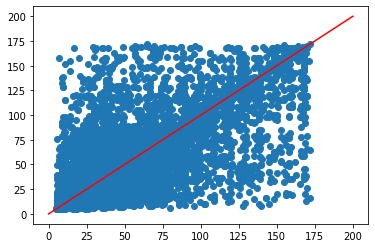

In [72]:
plt.scatter(y_test, y_pred)
plt.plot([0,200],[0,200],'r')

In [73]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

ValueError: ignored

In [106]:
#Using Random Forest for Regression
import pandas as pd
import numpy as np

In [107]:
finaldf = pd.read_csv('/content/drive/My Drive/car_predict_price_final.csv')

In [108]:
X = finaldf.drop(['price'],axis=1).values
# y = finaldf.price
y = pd.DataFrame(finaldf['price']).values

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [110]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestRegressor(n_estimators=100, random_state=0,bootstrap =True)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
# visualize_classifier(regressor, X_train, y_);


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
# from sklearn.metrics import mean_squared_error
# print(mean_squared_error(y_test, y_pred))

In [ ]:
# accuracy = regressor.score(y_test, y_pred)
# print(accuracy * 100,'%')

In [115]:
from sklearn import metrics

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
MAPE = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('MAPE',MAPE)
print('Mean Absolute Percentage Error (MAPE):', round(MAPE * 100, 2),'%')
# print('Accuracy:', round(100*(1 - mape), 2),'%')

Mean Absolute Error(MAE): 9.793408592890685
Mean Squared Error(MSE): 261.3486118449974
Root Mean Squared Error(RMSE): 16.166280086804058
MAPE 1.1702496781770624
Mean Absolute Percentage Error (MAPE): 117.02 %


In [113]:
from sklearn.metrics import r2_score#R square
r2_score(y_test, y_pred)

0.8270680825080421

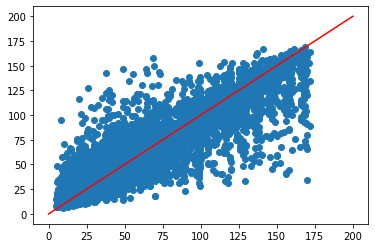

In [114]:
plt.scatter(y_test, y_pred)
plt.plot([0,200],[0,200],'r')

In [116]:
##linearRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

In [117]:
finaldf = pd.read_csv('/content/drive/My Drive/car_predict_price_final.csv')

In [118]:
X = finaldf.drop(['price'],axis=1).values
# y = finaldf.price
y = pd.DataFrame(finaldf['price']).values

In [119]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
mse = np.mean((lm.predict(X) - y) ** 2)
r_squared = lm.score(X, y)
adj_r_squared = r_squared - (1 - r_squared) * (X.shape[1] / (X.shape[0] - X.shape[1] - 1))

array([[41.56943099],
       [96.18641008],
       [67.79832907],
       ...,
       [47.96082113],
       [19.35146494],
       [46.2036221 ]])

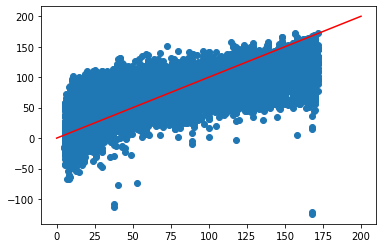

In [122]:
plt.scatter(y, lm.predict(X))
plt.plot([0,200],[0,200],'r')

In [124]:
print('MSE:',mse)
print('R_squared:',r_squared)
print('adj_r_squared:',adj_r_squared)
MAPE = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('MAPE:',MAPE)

MSE: 494.9121437607625
R_squared: 0.6708008445616342
adj_r_squared: 0.6619049725926646
MAPE: 1.1702496781770624


In [100]:
print(f_regression(X, y))

(array([8.95223718e-01, 5.32470123e+01, 3.75316784e+00, ...,
                  nan, 3.02877643e+03, 3.23289725e+00]), array([3.44070657e-01, 2.98910969e-13, 5.27136965e-02, ...,
                  nan, 0.00000000e+00, 7.21795097e-02]))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [99]:
# 印出係數
print(lm.coef_)

# 印出截距
print(lm.intercept_ )

[[-12.66761103  19.55591415  19.2224687  ...   0.          10.40187248
    1.3815768 ]]
[-9347.09155691]
